### Lab IV: Linear Models
### Rachel Seo ydp7xv
#### Answer all three sets of questions

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
   
   a. A model is "linear" when the the coefficients presents the variables in a straight line. The coefficient should only have only have a power of 1.  
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There's further explanation at the end of this document, if needed.
   
   a. The coefficient for a dummy/one-hot-encoded variable calculates the average difference in the dependent variable between the given category and the baseline category. We need to either drop the $y$ intercept or not include the constant (recommended). 
3. Can linear regression be used for classification? Explain why, or why not.
   
   a. Not very well because linear regression is continuous but classification is categorical. 
4. If you have a high accuracy on training but low on testing, what might be the problem? It also might be you see a pattern in the residuals. 
   
   a.  The problem may be that the model is over fitting the data.
5. Review this page: [Non-Linear with Linear](https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_non_linear_link.html) What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
   
   a. polynomial regression 
   
   b. binned regression
6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
   
   a. intercept = the value of $y$ when $x$ is zero
   
   b. slope coefficient = the change in the dependent variable $y$ for a one-unit increase 
   
   c. coefficient for a dummy/one-hot-encoded variable = average difference in the dependent variable between the given category and the baseline category

**Q1.** Load clean q1_clean: https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv 

The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighborhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

In [69]:
# imports
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# loading data 

from pandas import read_csv

q1_clean = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
q1_clean.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by `Neighborhood `; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighborhood `.

In [11]:
grouped_q1 = q1_clean.groupby("Neighbourhood ")

avg_price = grouped_q1["Price"].mean().sort_values(ascending=False)
avg_scores = grouped_q1["Review Scores Rating"].mean().sort_values(ascending=False)

print(avg_price)
print(avg_scores)

# Manhattan is the most expensive on average 

Neighbourhood 
Manhattan        183.664286
Staten Island    146.166667
Brooklyn         127.747378
Queens            96.857233
Bronx             75.276498
Name: Price, dtype: float64
Neighbourhood 
Brooklyn         92.363497
Manhattan        91.801496
Bronx            91.654378
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64


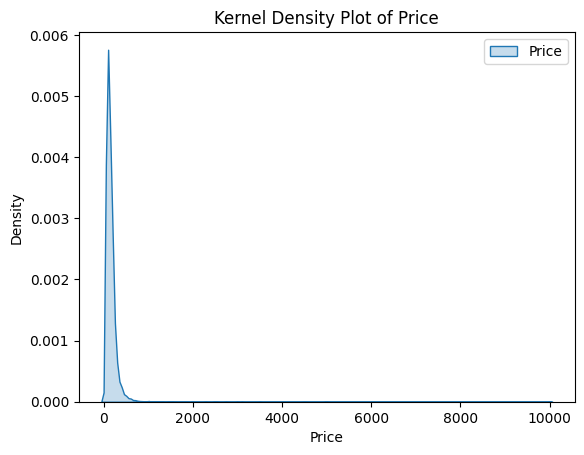

In [12]:
# KDE for price

sns.kdeplot(q1_clean["Price"], label="Price", fill=True)
plt.title("Kernel Density Plot of Price")
plt.legend()
plt.show()


/tmp/ipykernel_90937/586668147.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


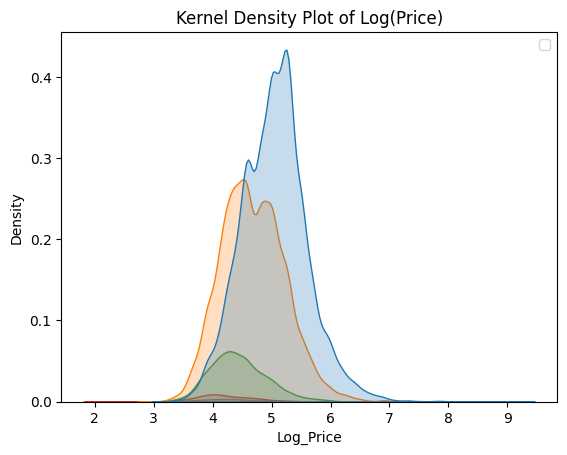

In [13]:
# KDE for log price 

q1_clean['Log_Price'] = np.log(q1_clean['Price'])
sns.kdeplot(q1_clean, x = "Log_Price", hue="Neighbourhood ", fill=True)
plt.title("Kernel Density Plot of Log(Price)")
plt.legend()
plt.show()

2. Regress price on `Neighborhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
   
   - The regression coefficients printed below are the same as those in the table from part 1. The coefficients in a regression of a continuous variable on one categorical variable represents the group mean for each category. 

In [14]:
# one-hot encoding
df_dummies = pd.get_dummies(q1_clean['Neighbourhood '], prefix='Neighbourhood ')

# model without intercept
X = df_dummies
y = q1_clean['Price']

# model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_) # coefficients

[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
   
    - In order to leave an intercept in the linear model, we must modify the model so that one of the Neighbourhood categories is used as a reference group. 
    - The intercept represents the mean price of the reference category whereas the coefficients represent the mean price between that neighborhood and the reference category.
    - To get the no-intercept regression coefficients from the intercept regression coefficients, I need to add the intercept to the coefficient.

In [15]:
# model with intercept 
Z = pd.get_dummies(q1_clean['Neighbourhood '], prefix='Neighbourhood ', drop_first=True)
y = q1_clean['Price']

model = LinearRegression()
model.fit(X, y)

print("Intercept (Reference Group - Neighborhood A):", model.intercept_)
print("Coefficients:", model.coef_)

Intercept (Reference Group - Neighborhood A): 125.94241234634988
Coefficients: [-50.66591465   1.804966    57.72187398 -29.08517964  20.22425432]


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighborhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [30]:
# regression of `Price` on `Review Scores Rating` and `Neighbourhood`

X1 = pd.get_dummies(q1_clean[['Neighbourhood ', 'Review Scores Rating']], drop_first=True)
y = q1_clean['Price']

# adding continuous variable
X1['Review Scores Rating'] = q1_clean['Review Scores Rating']

# splitting into training and test 
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=99)

# model
model = LinearRegression()
model.fit(X1_train, y_train)

# predicting
y_pred = model.predict(X1_test)

# R-squared
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Extract the coefficient on Review Scores Rating
# Ensure that 'Review Scores Rating' is included in the X DataFrame
coef_dict = dict(zip(X1.columns, model.coef_))
coef_review = coef_dict['Review Scores Rating']

print("Test set R^2:", r2)
print("Test set RMSE:", rmse)
print("Coefficient on Review Scores Rating:", coef_review)

Test set R^2: 0.07244815327117149
Test set RMSE: 121.48983149798269
Coefficient on Review Scores Rating: 1.0075976052691327


In [31]:
# predict most expensive property
q1_clean['Predicted Price'] = model.predict(X1)

# Sort by predicted price to find the most expensive property
expensive_property = q1_clean.sort_values(by='Predicted Price', ascending=False).head(1)
print("Most Expensive Property:\n", expensive_property[['Neighbourhood ', 'Property Type', 'Review Scores Rating', 'Predicted Price']])

Most Expensive Property:
       Neighbourhood  Property Type  Review Scores Rating  Predicted Price
13772      Manhattan     Apartment                 100.0       191.763411


5. Run a regression of `Price` on `Review Scores Rating` and `Neighborhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [ ]:
# one-hot encoding the categorical variables
X2 = pd.get_dummies(q1_clean[['Neighbourhood ', 'Property Type']], drop_first=True)
X2['Review Scores Rating'] = q1_clean['Review Scores Rating']
y = q1_clean['Price']

# split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# model
model = LinearRegression()
model.fit(X2_train, y2_train)

# prediction
y2_pred = model.predict(X2_test)

r2_2 = r2_score(y2_test, y2_pred)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y2_pred))

# coefficient for `Review Scores Rating`
review_scores_coeff_2 = model.coef_[list(X2.columns).index('Review Scores Rating')]

# results
print(f"R^2 on Test Set: {r2_2:.4f}")
print(f"RMSE on Test Set: {rmse_2:.2f}")
print(f"Coefficient on Review Scores Rating: {review_scores_coeff_2:.2f}")


R^2 on Test Set: 0.0542
RMSE on Test Set: 140.30
Coefficient on Review Scores Rating: 1.20
Most Expensive Property:
    Neighbourhood  Property Type  Review Scores Rating  Predicted Price
80      Manhattan          Loft                 100.0       261.701573


In [27]:
# predict prices for the full dataset to find the most expensive property
q1_clean['Predicted Price'] = model.predict(X2)

# Sort by predicted price to find the most expensive property
most_expensive_property = q1_clean.sort_values(by='Predicted Price', ascending=False).head(1)
print("Most Expensive Property:\n", most_expensive_property[['Neighbourhood ', 'Property Type', 'Review Scores Rating', 'Predicted Price']])

Most Expensive Property:
    Neighbourhood  Property Type  Review Scores Rating  Predicted Price
80      Manhattan          Loft                 100.0       261.701573


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.
   
   - The coefficient on `Review Scores Rating` increases from part 4 to 5 and this means that after controlling for `Property Type`, the impact of `Review Scores Rating` on `Price` appears stronger.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [ ]:
# loading data 
car = pd.read_csv('../data/cars_hw.csv')
car.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [52]:
# cleaning data
car.dropna(inplace=True)

# dropping column 
# car.drop(columns=['Unnamed: 0'], inplace=True)

# log transformation
car['log_price'] = np.log(car['Price'])
car.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,log_price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,13.395439
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,13.432785
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,13.583579
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,12.933621
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,13.151922


2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [48]:
# summary 
car['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

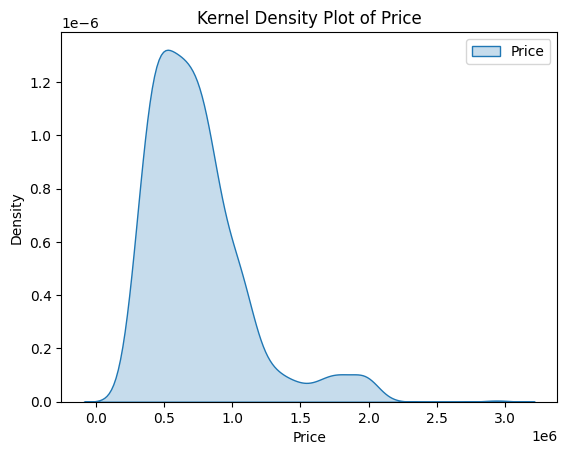

In [55]:
# KDE for price

sns.kdeplot(car["Price"], label="Price", fill=True)
plt.title("Kernel Density Plot of Price")
plt.legend()
plt.show()

- `Prices` looks very skewed to the right but generally in the 0-1.5 range.

In [56]:
car_make = car.groupby('Make')
car_make['log_price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


- Jeep, Kia, and MG Motors are on average, the more expensive car makers.

/tmp/ipykernel_90937/4176649211.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


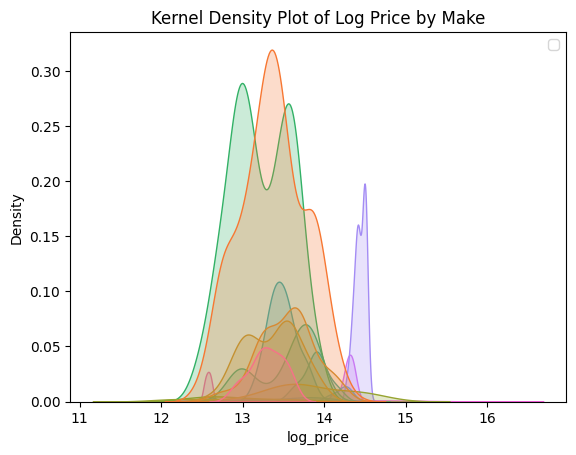

In [57]:
# KDE by `Make`

sns.kdeplot(data=car, x = "log_price", hue="Make", fill=True)
plt.title("Kernel Density Plot of Log Price by Make")
plt.legend()
plt.show()

3. Split the data into an 80% training set and a 20% testing set.
   
   - Done below

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by how much?

In [53]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               976 non-null    object 
 1   Make_Year          976 non-null    int64  
 2   Color              976 non-null    object 
 3   Body_Type          976 non-null    object 
 4   Mileage_Run        976 non-null    int64  
 5   No_of_Owners       976 non-null    object 
 6   Seating_Capacity   976 non-null    int64  
 7   Fuel_Type          976 non-null    object 
 8   Transmission       976 non-null    object 
 9   Transmission_Type  976 non-null    object 
 10  Price              976 non-null    int64  
 11  log_price          976 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 91.6+ KB


In [61]:
# regressing price on numeric variables

# selecting only numeric variables
numeric_vars = car.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('Price')
numeric_vars.remove('log_price')  # remove target variable from the list of features

# data split
X3 = car[numeric_vars]
y3 = car['log_price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(X3_train, y3_train)

# predict on test data
y3_pred = model.predict(X3_test)

r2 = r2_score(y3_test, y3_pred)
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))

print(f'R^2: {r2}')
print(f'RMSE: {rmse}')


R^2: 0.4677866421591417
RMSE: 0.3026984951361233


In [62]:
# regress price on categorical variables

# only categorical variables
categorical_vars = car.select_dtypes(include=['object']).columns.tolist()

# one-hot encoding
car_encoded = pd.get_dummies(car, columns=categorical_vars, drop_first=True)

# data split
X4 = car_encoded.drop('log_price', axis=1)
y4 = car_encoded['log_price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(X4_train, y4_train)

# Predict on the test data
y4_pred = model.predict(X4_test)

# Evaluate the model
r2_4 = r2_score(y4_test, y4_pred)
rmse_4 = np.sqrt(mean_squared_error(y4_test, y4_pred))

print(f'R^2: {r2_4}')
print(f'RMSE: {rmse_4}')


R^2: 0.9525142212046768
RMSE: 0.09041680553016279


- $R^2$ is higher and RMSE is lower for the categorical regression model than the numeric, so it is more accurate at this point.

In [68]:
# joint model 

# numeric and categorical variables
numeric_vars = car.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('Price') 
numeric_vars.remove('log_price') 

# data split
X5 = car_encoded.drop(['log_price'], axis=1) # encoding from above
y5 = car_encoded['log_price']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(X5_train, y5_train)

# predict on test data
y5_pred = model.predict(X5_test)

r2_5 = r2_score(y5_test, y5_pred)
rmse_5 = np.sqrt(mean_squared_error(y5_test, y5_pred))

print(f'R^2: {r2_5}')
print(f'RMSE: {rmse_5}')

R^2: 0.9525142212046768
RMSE: 0.09041680553016279


- The joint model performs at the same level as the categorical regression model.

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [91]:
# use PolynomialFeatures to create polynomial features from the numeric variables
poly = PolynomialFeatures(degree=2, include_bias=False)
numeric_poly = poly.fit_transform(car_encoded[numeric_vars])

# dataframe with poly features
numeric_poly_df = pd.DataFrame(numeric_poly, columns=poly.get_feature_names_out(numeric_vars))

# polynomial features + encoded categorical variables
car_poly_encoded = pd.concat([numeric_poly_df, car_encoded.drop(columns=numeric_vars)], axis=1)

# data split
X6 = car_poly_encoded.drop('log_price', axis=1)
y6 = car_poly_encoded['log_price']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(X6_train, y6_train)

# predict 
y6_pred = model.predict(X6_test)

r2_6 = r2_score(y6_test, y6_pred)
rmse_6 = np.sqrt(mean_squared_error(y6_test, y6_pred))

print(f'R^2: {r2_6}')
print(f'RMSE: {rmse_6}')

R^2: 0.959733433942101
RMSE: 0.08326062638018948


- As I increase the degree of the expansion, $R^2$ and RMSE decreases. By degree=13, $R^2$ goes negative on the test set. 
- At degree=2 (best expanded features model), $R^2$ is 0.9597 and RMSE is 0.08326. Compared to my best model in part 4, which was the categorical regression and joint model, the expanded features model is only a little bit better with a 0.007 greater $R^2$ and .01 smaller RMSE.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

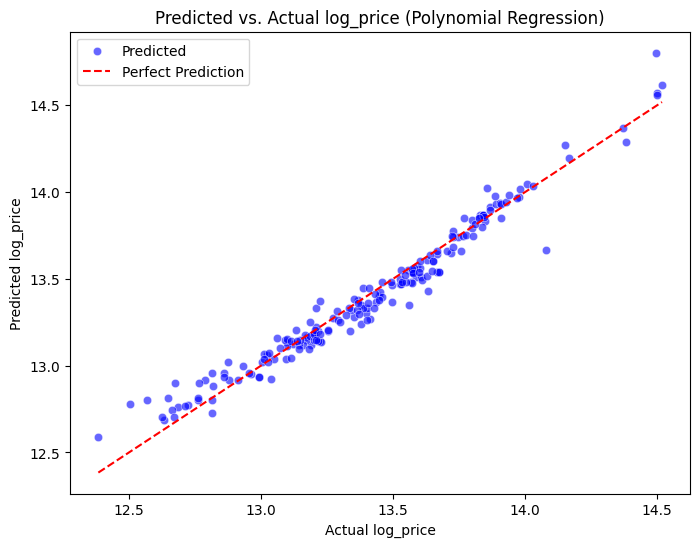

In [ ]:
# scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y6_test, y=y6_pred, alpha=0.6, color='blue', label='Predicted')

# 45-degree reference line (perfect predictions)
plt.plot([y6_test.min(), y6_test.max()], [y6_test.min(), y6_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# labels and title
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Predicted vs. Actual log_price (Polynomial Regression)")
plt.legend()
plt.show()

# The predicted values and true values roughly line up along the diagonal.

In [97]:
# residuals/errors for test data
residuals = y6_test - y6_pred
print(f'Residuals: {residuals}')

Residuals: 317    0.144051
793    0.042720
48    -0.039132
383   -0.024762
969    0.018866
         ...   
15    -0.166606
796   -0.025278
236    0.099271
755   -0.147821
101   -0.069578
Name: log_price, Length: 196, dtype: float64


/tmp/ipykernel_90937/3766738763.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)
/tmp/ipykernel_90937/3766738763.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


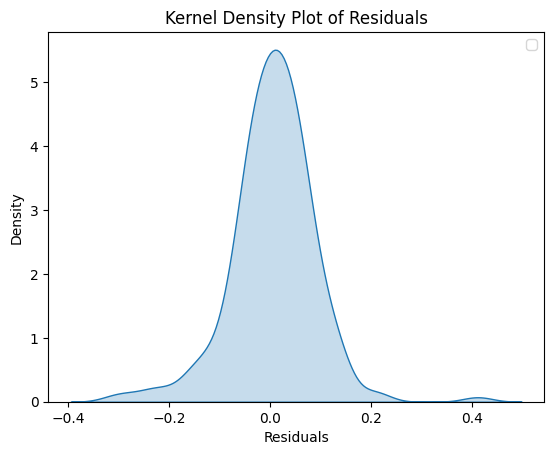

In [98]:
# KDE for residuals 

sns.kdeplot(residuals, shade=True)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

- The residuals look bell-shaped around 0. 
- Using the PolynomialFeatures allows for more complex relationships and captures nonlinear relationships between numeric variables and log_price. Its weakness however, is that it increases the number of predictors significantly, so it may lead to overfitting.

**Q3.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.

2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [100]:
sleep = pd.read_csv('../data/sleep_health_and_lifestyle_dataset.csv')

sleep.dropna(inplace=True)

# dropping column 
sleep.drop(columns=['Person ID'], inplace=True)

sleep.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


In [101]:
print(sleep.info()) 
print(sleep.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   155 non-null    object 
 1   Age                      155 non-null    int64  
 2   Occupation               155 non-null    object 
 3   Sleep Duration           155 non-null    float64
 4   Quality of Sleep         155 non-null    int64  
 5   Physical Activity Level  155 non-null    int64  
 6   Stress Level             155 non-null    int64  
 7   BMI Category             155 non-null    object 
 8   Blood Pressure           155 non-null    object 
 9   Heart Rate               155 non-null    int64  
 10  Daily Steps              155 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 15.7+ KB
None
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level

- Target/outcome variable: Stress Level
- Features/predictors: Sleep Duration

3. Split the sample into an ~80% training set and a ~20% test set.

    - Done below

4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [102]:
# numeric regression 

# selecting only numeric variables
numeric_v = sleep.select_dtypes(include=[np.number]).columns.tolist()
numeric_v.remove('Stress Level')  # remove target variable from the list of features

# data split
a = sleep[numeric_v]
b = sleep['Stress Level']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(a_train, b_train)

# predict on test data
b_pred = model.predict(a_test)

r2_a = r2_score(b_test, b_pred)
rmse_a = np.sqrt(mean_squared_error(b_test, b_pred))

print(f'R^2: {r2_a}')
print(f'RMSE: {rmse_a}')

R^2: 0.9344487286883256
RMSE: 0.5161726450761119


In [105]:
# categorical regression 

# only categorical variables
categorical_v = sleep.select_dtypes(include=['object']).columns.tolist()

# one-hot encoding
sleep_encoded = pd.get_dummies(sleep, columns=categorical_v, drop_first=True)

# data split
a1 = sleep_encoded.drop('Stress Level', axis=1)
b1 = sleep_encoded['Stress Level']
a1_train, a1_test, b1_train, b1_test = train_test_split(a1, b1, test_size=0.2, random_state=99)

# regression model
model = LinearRegression()
model.fit(a1_train, b1_train)

# Predict on the test data
b1_pred = model.predict(a1_test)

# Evaluate the model
r2_b = r2_score(b1_test, b1_pred)
rmse_b = np.sqrt(mean_squared_error(b1_test, b1_pred))

print(f'R^2: {r2_b}')
print(f'RMSE: {rmse_b}')

R^2: 0.9168871252213193
RMSE: 0.5812173604325543


5. Which model performed the best, and why?

    - The numeric model performed the best because there were more variables that were numeric than categorical.

6. What did you learn?
   
   - I learned that the dummy variable trap is very real, especially when you have so many different variables. This doesn't apply to numeric models - which is one of the reasons why I think my numeric model above was able to handle more variable values in a precise manner than my categorical model. 

### Dummy Variable Trap 


In linear regression with categorical variables you should be careful of the Dummy Variable Trap. 
The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a 
scenario in which two or more variables are highly correlated; in simple terms one variable can 
be predicted from the others. This can produce singularity of a model, meaning your model just won't 
work. Read about it here

Idea is to use dummy variable encoding with drop_first=True, this will omit one column from each 
category after converting categorical variable into dummy/indicator variables. You WILL NOT lose 
and relevant information by doing that simply because your all point in dataset can fully be 
explained by rest of the features.

Here is complete code on how you can do it for a "jobs" dataset

So you have your X features:

Age, Gender, Job, Classification 

And one numerical features that you are trying to predict:

Wage

First you need to split your initial dataset on input variables and prediction, 
assuming its pandas dataframe it would look like this:

Input variables (your dataset is bit different but whole code remains the same, 
you will put every column from dataset in X, except one that will go to Y. pd.get_dummies 
works without problem like that - it will just convert categorical variables and it won't 
touch numerical):

X = jobs[['Age','Gender','Job','Classification']]

Prediction:

Y = jobs['Wage']

Convert categorical variable into dummy/indicator variables and drop one in each category:

X = pd.get_dummies(data=X, drop_first=True)

So now if you check shape of X (X.shape) with drop_first=True you will see that it has 
4 columns less - one for each of your categorical variables.

You can now continue to use them in your linear model. For scikit-learn implementation it 
could look like this:


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
    
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 
1 column after dummy encoding

regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

### Transformation versus Normalization

Use a **log transformation** when your data is strictly positive and heavily skewed towards larger values (right-skewed), while an **arcsinh transformation** is better suited for data with both positive and negative values, or when you need to handle potential zero values; **normalize** your data when you need to scale all values to a similar range, typically between 0 and 1, and especially when using algorithms sensitive to feature scale, but not necessarily to achieve a **normal distribution**. 
Key points about each transformation: 

    Log transformation: 

    Best for positively skewed data with large variations in magnitude. 

Useful when analyzing relative changes rather than absolute differences. 
Cannot handle negative values. 

Arcsinh transformation:

    Can handle both positive and negative data. 

Effective for data with extreme values on both ends of the spectrum. 
Often used when dealing with proportions or percentages near 0 or 1. 

Normalization: 

    Scales data to a common range, usually between 0 and 1. 

Useful when comparing features with different scales in machine learning algorithms. 
Does not necessarily transform the data distribution to be normal. 
